# Opportunity analysis of sports using log optimal betting strategy

## Load Libraries

In [1]:
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes
import cvxpy as cp
%matplotlib inline
import math
import importlib as imp
import bettingLib as bl
import time

## Figure out the minimum win prob per bet it would take to realize an expected return of .5% as a function of the cutoff

In [2]:
imp.reload(bl)
nVals = 8
ns = [n for n in range(1,nVals+1)]
ns.remove(5)
ns.remove(7)
vig = .02
probs = np.zeros(len(ns))
cutoff = .005
for i in range(len(ns)):
    probs[i], _ = bl.calc_breakeven_prob(vig, ns[i], cutoff=cutoff)


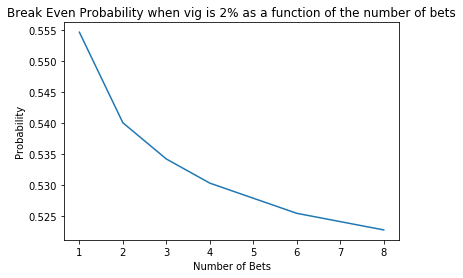

In [3]:
plt.plot(ns, probs)
plt.title('Break Even Probability when vig is 2% as a function of the number of bets')
plt.xlabel('Number of Bets')
plt.ylabel('Probability')
plt.show()

## Assuming you have a 52.5% win prob, what is the optimal betting strategy?

In [5]:
start = time.time()
dfProb = pd.DataFrame([.525]*1, columns=['Probabilities'])
vig = .02
weights1, expectedReturn1 =  bl.optimal_bet_given_probs(dfProb, vig)
print ('It took ' + str((time.time() - start)/60.))

It took 0.00038504997889200846


In [6]:
start = time.time()
dfProb = pd.DataFrame([.525]*2, columns=['Probabilities'])
vig = .02
weights2, expectedReturn2 =  bl.optimal_bet_given_probs(dfProb, vig)
print ('It took ' + str((time.time() - start)/60.))

It took 0.0006131331125895182


In [7]:
start = time.time()
dfProb = pd.DataFrame([.525]*4, columns=['Probabilities'])
vig = .02
weights4, expectedReturn4 =  bl.optimal_bet_given_probs(dfProb, vig)
print ('It took ' + str((time.time() - start)/60.))

It took 0.0017479499181111654


In [8]:
start = time.time()
dfProb = pd.DataFrame([.525]*8, columns=['Probabilities'])
vig = .02
weights8, expectedReturn8 =  bl.optimal_bet_given_probs(dfProb, vig)
print ('It took ' + str((time.time() - start)/60.))

It took 0.026878833770751953
